# Apprentissage supervisé

## Regression lineaire

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier

In [41]:
titanic = sns.load_dataset('titanic')
titanic.shape

(891, 15)

In [43]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [45]:
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis = 0, inplace = True)
titanic['sex'].replace(['male', 'female'], [0, 1], inplace = True)
titanic.head()

/tmp/ipykernel_204913/3519876947.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['sex'].replace(['male', 'female'], [0, 1], inplace = True)
/tmp/ipykernel_204913/3519876947.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['sex'].replace(['male', 'female'], [0, 1], inplace = Tr

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [6]:
np.random.seed(0)
m = 100
X = np.linspace(0, 10, m).reshape(m, 1)
y = X + np.random.randn(m, 1)

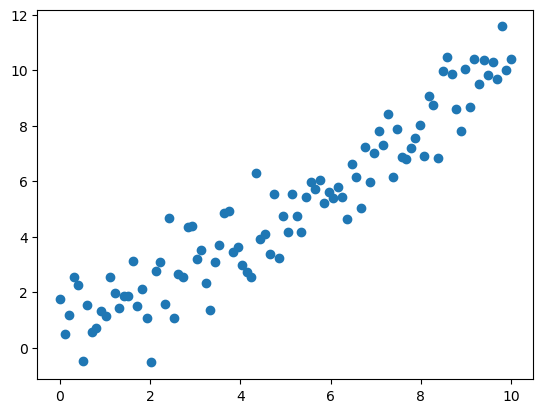

In [8]:
plt.scatter(X, y)

### Important: Les parametres entrés dans model.fit(), model.score(), model.predict() doivent etre de dim 2. Toujours penser à faire un reshape

In [12]:
model = LinearRegression() # Modele

model.fit(X, y) # Entrainement du modele

model.score(X, y) # Evaluation du modele: Coefficient de determination (R**2)

0.8881140743377214

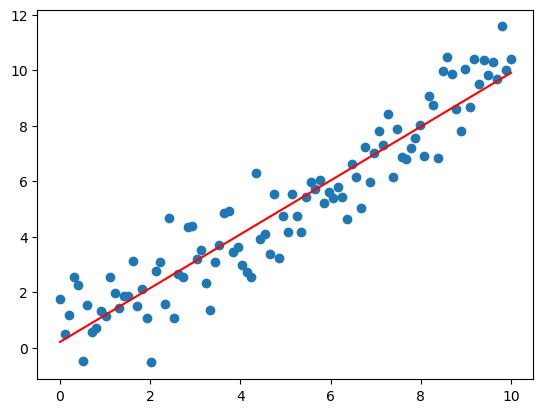

In [14]:
# Predictions

predictions = model.predict(X)

plt.figure()
plt.scatter(X, y)
plt.plot(X, predictions, c = 'r')

## Support Vector Machine (SVM)

In [19]:
np.random.seed(0)
m = 100
X = np.linspace(0, 10, m).reshape(m, 1)
y = X**2 + np.random.randn(m, 1)

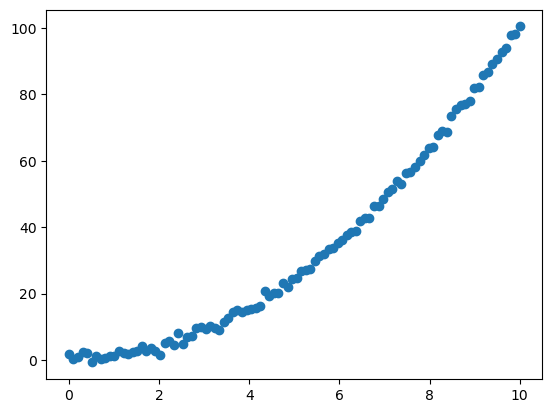

In [21]:
plt.scatter(X, y)

In [31]:
model = SVR(C=100) # Modele

model.fit(X, y) # Entrainement du modele

model.score(X, y) # Evaluation du modele: Coefficient de determination (R**2)

/home/merf/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9989763625652847

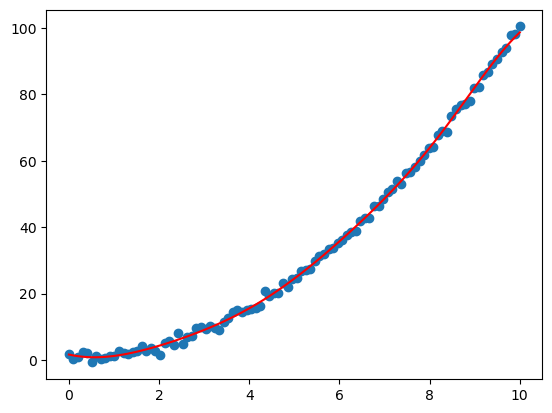

In [33]:
# Predictions

predictions = model.predict(X)

plt.figure()
plt.scatter(X, y)
plt.plot(X, predictions, c = 'r')

## Classification

In [51]:
model = KNeighborsClassifier()

In [53]:
y = titanic['survived']
X = titanic.drop('survived', axis = 1)

In [55]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: survived, Length: 714, dtype: int64

In [57]:
X

,pclass,sex,age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0
...,...,...,...
885,3,1,39.0
886,2,0,27.0
887,1,1,19.0
889,1,0,26.0


In [61]:
model.fit(X, y)
model.score(X, y)

0.8305322128851541

In [63]:
model.predict(X)

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,

In [78]:
def survie(model, pclass = 3, sex = 0, age = 26):
    x = np.array([pclass, sex, age]).reshape(1, 3)
    print(model.predict(x))
    print(model.predict_proba(x)) # Probabilté d'appartenir à une classe

In [80]:
survie(model, 2, 1, 12)

[1]
[[0.4 0.6]]


/home/merf/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/merf/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


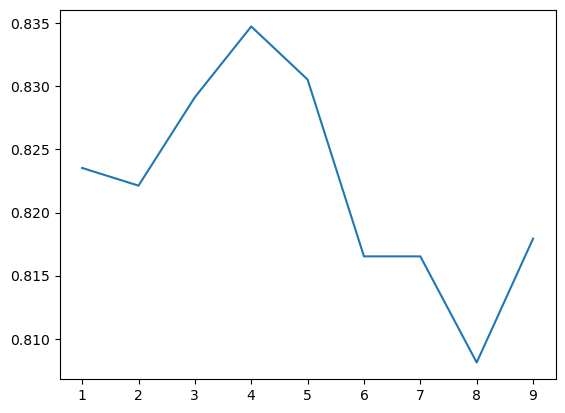

In [96]:
# Meilleur nombre de voisin 

evaluate = []
for nn in range(1, 10):
    model2 = KNeighborsClassifier(n_neighbors = nn)
    model2.fit(X, y)
    evaluate.append(model2.score(X, y))

plt.plot(range(1, 10), evaluate)

## Train-test-split

In [109]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X.shape

(150, 4)

In [117]:
from sklearn.model_selection import train_test_split

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # Separer les données en entrainement et test

In [133]:
model = KNeighborsClassifier(n_neighbors = 2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9333333333333333

## Validation set

Le validation test nous permet de chercher les meilleurs parametres du modele, pour avoir de meilleurs performances sans avoir a toucher le test set. Car si on règle les parametre du modele dans le test set, on ne pourra plus evaluer le modele là dessus car il aura déjà vu ces données de maniere indirecte. <br><br>On a donc:<br>Train set: Pour entrainer le modèle<br>Validation set: Pour trouver les meilleurs parametres du modèles<br>Test set: Pour évaluer le modèle

## Cross-validation

La cross-validation consiste a entrainer puis valider le modele sur plusieurs decoupe possible de train set. Par exemple si on decoupe le train set en 5 parties, on peut l'entrainer sur 4 et le valider sur la dernieres partie. On va ensuite refaire tous ça pour toutes les combinaisons possible; et on fera la moyenne des 5 scores obtenus<br><br>Il existe plusieurs manieres de decouper le train set(KFold, StratifiedFold(Par default sur sklearn), ShuffleSplit, ...)

In [225]:
from sklearn.model_selection import cross_val_score, validation_curve, GridSearchCV, learning_curve
# cross_val_score(model, X, y, nombre de split) ça retourne un tableau avec les different score. On pourra en faire la moyenne

In [145]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv =5)

array([0.95833333, 0.95833333, 1.        , 1.        , 0.91666667])

In [147]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv =5).mean()

0.9666666666666668

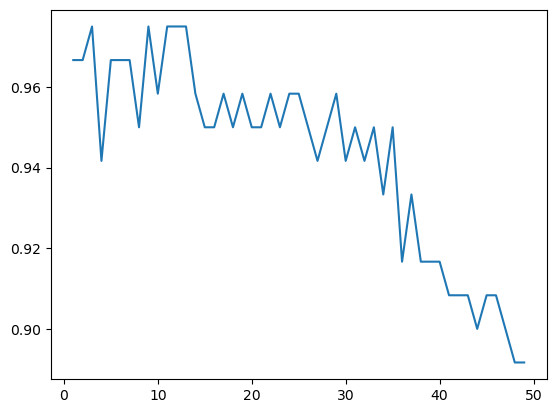

In [153]:
# On peut le refaire avec different modele (Parametre different pour garder le meilleur)

evaluate = []
for nn in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(nn), X_train, y_train, cv =5).mean()
    evaluate.append(score)
    
plt.plot(range(1,50), evaluate)

Il existe une fonction de sklearn pour pour creer ce genre de graphe sans avoir a ecrire une boucle for: Validation curve

## Validation curve

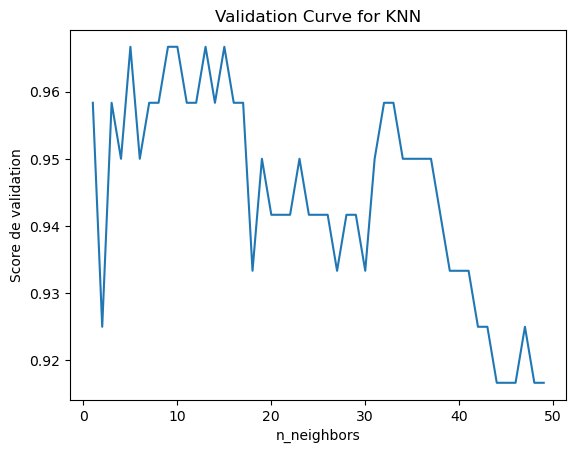

In [181]:
# validation_curve(model, X, y, "nom de l'hyperparametre a régler", "liste des nombres pour l'hyperparametre", 'nombre de splits')

model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(model, X_train, y_train, param_name='n_neighbors', param_range=k, cv = 5)

plt.plot(k, val_score.mean(axis=1))
plt.xlabel('n_neighbors')
plt.ylabel('Score de validation')
plt.title('Validation Curve for KNN')
plt.show()

Très utile pour détecter les cas de surapprentissage. On parle de surapprentissage lorsque les erreurs sur le train diminuent et celles sur le test augmentent

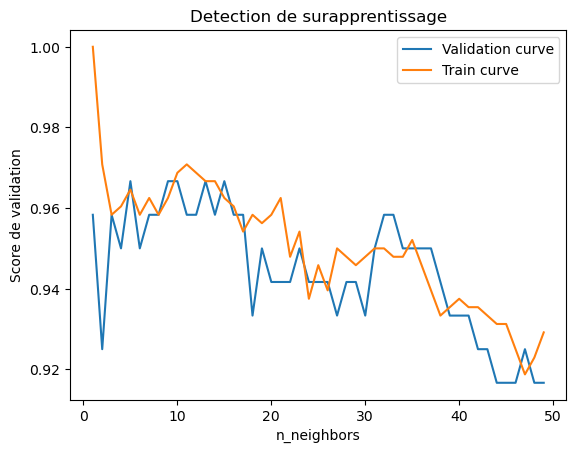

In [190]:
plt.figure()
plt.plot(k, val_score.mean(axis=1), label = 'Validation curve')
plt.plot(k, train_score.mean(axis=1), label = 'Train curve')
plt.xlabel('n_neighbors')
plt.ylabel('Score de validation')
plt.title('Detection de surapprentissage')
plt.legend()
plt.show()

Il existe plusieurs autres hyperparametre qui pourraient etre reglés.<br> Alors pour tester tous ces hyper parametre le mieux est d'utiliser GridSearchCV

## GridSearchCV

In [196]:
# Creation d'un dictionnaire avec tous les hyper parametres qu'on souhaite régler
param_grid = {'n_neighbors': np.arange(1, 20), 'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)

# On considere notre grid comme un estimateur/modele. On l'entraine donc...
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [198]:
# Modele ayant obtenu le meilleur score
grid.best_score_

0.9666666666666668

In [200]:
 # Meilleurs parametres
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 13}

In [204]:
# Sauvegarder le modele
model = grid.best_estimator_

In [206]:
# Evaluation sur les données de test

model.score(X_test, y_test)

1.0

In [208]:
from sklearn.metrics import confusion_matrix

Text(0.5, 1.0, 'Confusion Matrix')

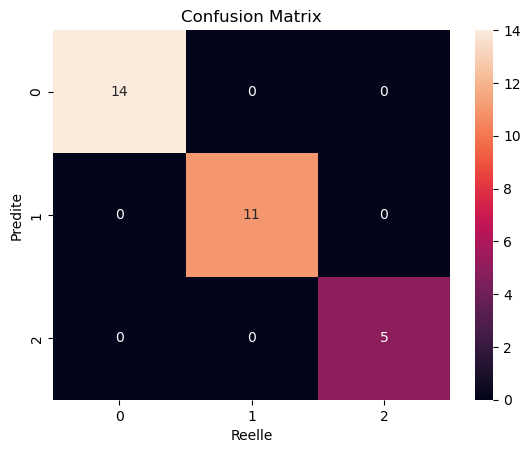

In [220]:
conf_mat = confusion_matrix(y_test, model.predict(X_test))
sns.heatmap(conf_mat, annot = True)
plt.xlabel('Reelle')
plt.ylabel('Predite')
plt.title('Confusion Matrix')